In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import adjusted_rand_score

In [5]:
iris = load_iris()
X = iris.data
y = iris.target

In [72]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

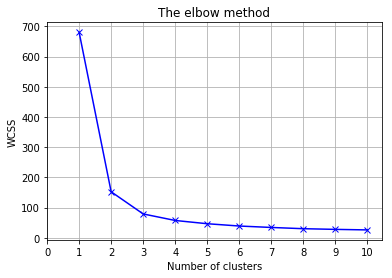

In [65]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.xticks(np.arange(0, 11, 1.0))
plt.grid()
plt.savefig("elbow.png",format = 'png', dpi=300)

In [66]:
kmeans = KMeans(n_clusters = 3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [67]:
ars = adjusted_rand_score(y, y_kmeans)
print('ars={}'.format(ars))

ars=0.7302382722834697


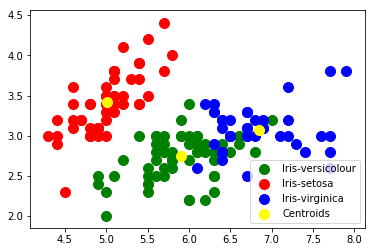

In [69]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.savefig("cluster.png",format = 'png', dpi=300)